In [2]:
import pandas as pd
import json

In [3]:
out = pd.read_json('posts.json')

In [4]:
out

,authorName,id,likes,timestamp
0,Ben Wasman,2.167587e+15,147,2019-05-08 18:47:06
1,Xue Yao Zou,2.168203e+15,74,2019-05-09 04:47:37
2,Ryan Mimna,2.169102e+15,9,2019-05-09 17:53:11
3,Alyssa Furukawa,2.167648e+15,278,2019-05-08 19:40:47
4,Anna Bennett,2.168845e+15,18,2019-05-09 14:26:32
5,Andrew Langalis,2.167927e+15,21,2019-05-09 00:18:02
6,Katherine Kvellestad,2.165259e+15,261,2019-05-07 04:56:19
7,Varshini Gali,1.475646e+15,1.1K,2017-10-23 00:55:34
8,Mackenzie Morrison,1.450048e+15,711,2017-09-23 03:12:17
9,Jonah Miller,1.355425e+15,1.1K,2017-06-13 16:10:35


In [5]:
out['likes'] = out['likes'].apply(lambda x: (x.replace("K", "49").replace(".","") if ("K" in x) else x))
out.likes = out.likes.astype('int64')

In [6]:
out.sort_values('timestamp')

,authorName,id,likes,timestamp
483,Alex Haynes,9.731265e+14,9,2016-03-02 21:24:52
1109,Anton Relin,1.053458e+15,41,2016-07-18 01:09:13
482,Antonio Menarde,1.123906e+15,18,2016-10-23 00:31:43
731,Luke Chen,1.146512e+15,33,2016-11-17 05:17:47
916,Tristrum Tuttle,1.159903e+15,23,2016-11-30 18:50:06
1329,Alden,1.179374e+15,133,2016-12-17 03:18:52
469,Antonio Menarde,1.181881e+15,290,2016-12-19 01:07:17
1151,Adrian Fletcher,1.255827e+15,342,2017-03-12 20:01:01
1155,Seyoung Kim,1.262011e+15,444,2017-03-19 22:39:21
795,Jesus Tamez,1.262011e+15,715,2017-03-19 22:40:14


In [7]:
import pylab as plt
import scipy.stats as st
from datetime import datetime

In [8]:
min(out['timestamp'].astype('int64'))

1456953892000000000

In [9]:
line = st.linregress(out['timestamp'].astype('int64') - min(out['timestamp'].astype('int64')), out['likes'])
m = line.slope
b = line.intercept
print(line)
ys = [(m*(x - min(out['timestamp'].astype('int64'))) + b) for x in out['timestamp'].astype('int64')]
xs = out['timestamp'].sort_values()
print(m)

LinregressResult(slope=-9.039112046654211e-15, intercept=980.0843724982667, rvalue=-0.34112771212889986, pvalue=1.4338617048099014e-39, stderr=6.654652618997946e-16)
-9.039112046654211e-15


Text(0, 0.5, 'Likes')

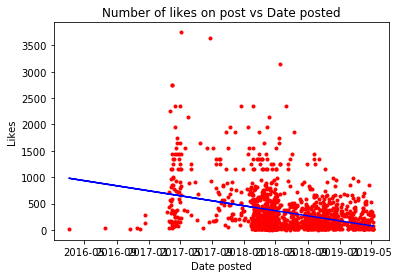

In [11]:
plt.plot(out['timestamp'], out['likes'], 'r.')
plt.plot(out['timestamp'], ys, 'b-')
plt.title("Number of likes on post vs Date posted")
plt.xlabel("Date posted")
plt.ylabel("Likes")

Text(0.5, 0, 'Date')

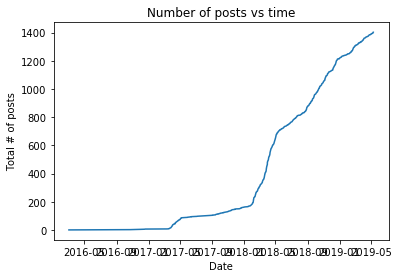

In [12]:
o = out.sort_values('timestamp').reset_index()
plt.plot(o['timestamp'],  o.index)
plt.title("Number of posts vs time")
plt.ylabel("Total # of posts")
plt.xlabel("Date")

In [13]:
out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 4 columns):
authorName    1403 non-null object
id            1402 non-null float64
likes         1403 non-null int64
timestamp     1403 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 43.9+ KB


In [14]:
r = out.groupby('authorName').aggregate({ 'likes': sum }).sort_values('likes', ascending=False).reset_index()
r.index += 1
r

,authorName,likes
1,Joyee Au Yeung,10746
2,Curie Shim,9222
3,Andrew Guo,7622
4,Abhinav Suri,7375
5,Andrej Ilić,7292
6,David Zhou,5537
7,Richard Chen,5409
8,Alyssa Furukawa,5065
9,Jesus Tamez,5033
10,Serena Miniter,4702


In [15]:
out['hour'] = out['timestamp'].apply(lambda x: x.hour)
out.groupby('hour').likes.count().sort_values(ascending=False)

hour
3     104
19    104
1     100
18     95
21     93
2      90
0      87
23     85
4      80
17     80
20     77
22     68
16     65
15     61
5      59
14     48
13     25
6      24
7      21
12     15
11      8
8       7
10      6
9       1
Name: likes, dtype: int64

Text(0.5, 0, 'Hour of day (0-24)')

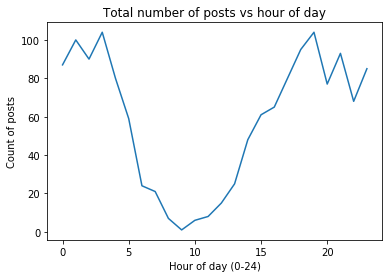

In [16]:
plt.plot(out.groupby('hour').likes.count())
plt.title("Total number of posts vs hour of day")
plt.ylabel("Count of posts")
plt.xlabel("Hour of day (0-24)")

Text(0.5, 0, 'Hour of day (0-24)')

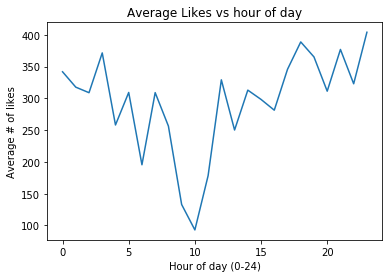

In [17]:
plt.plot(out.groupby('hour').likes.mean())
plt.title("Average Likes vs hour of day")
plt.ylabel("Average # of likes")
plt.xlabel("Hour of day (0-24)")


In [18]:
out.groupby('hour').likes.mean().sort_values(ascending=False)

hour
23    404.094118
18    388.852632
21    377.021505
3     371.557692
19    365.230769
17    345.750000
0     341.862069
12    329.200000
22    323.000000
1     317.680000
14    312.979167
20    311.337662
5     309.338983
7     309.047619
2     308.955556
15    298.377049
16    281.446154
4     258.150000
8     256.428571
13    250.240000
6     195.541667
11    178.375000
9     133.000000
10     93.000000
Name: likes, dtype: float64

In [19]:
out['timestamp'][0].tz_localize('US/Eastern')

Timestamp('2019-05-08 18:47:06-0400', tz='US/Eastern')

Text(0, 0.5, 'Count in bucket')

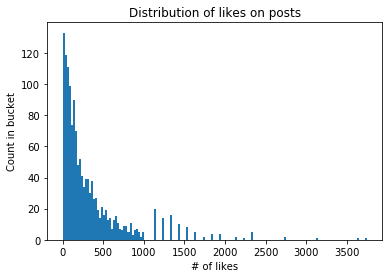

In [20]:
plt.hist(out['likes'], bins=150)
plt.title("Distribution of likes on posts")
plt.xlabel("# of likes")
plt.ylabel("Count in bucket")

In [21]:
out.sort_values('likes',ascending=False)[['authorName', 'likes']]

,authorName,likes
847,Sam Akhavan,3749
879,Djorn Patel,3649
93,Joyee Au Yeung,3149
1204,Bisher Haddadin,2749
376,Freddy Chang,2749
1200,Ransford Antwi,2349
129,Nick Joyner,2349
51,David Zhou,2349
750,Zach Drapkin,2349
1318,Ton Nguyen,2349


In [22]:
intermediate = out.groupby('authorName').agg({'likes': sum, 'timestamp': 'count'}).reset_index()
intermediate['likesPerPost'] = intermediate.apply(lambda x: (x.likes/x.timestamp), axis=1)


In [23]:
intermediate.columns = ['authorName', 'likes', 'count', 'likesPerPost']

In [24]:
intermediate.sort_values('likes', ascending=False).reset_index()[['authorName', 'likes', 'count', 'likesPerPost']]

,authorName,likes,count,likesPerPost
0,Joyee Au Yeung,10746,21,511.714286
1,Curie Shim,9222,13,709.384615
2,Andrew Guo,7622,20,381.100000
3,Abhinav Suri,7375,22,335.227273
4,Andrej Ilić,7292,20,364.600000
5,David Zhou,5537,8,692.125000
6,Richard Chen,5409,24,225.375000
7,Alyssa Furukawa,5065,12,422.083333
8,Jesus Tamez,5033,5,1006.600000
9,Serena Miniter,4702,5,940.400000


(array([33., 29., 27., 34., 36., 34., 33., 25., 19., 26., 27., 17., 10.,
        17., 18., 14., 15., 16., 14.,  4., 14., 21.,  8., 12.,  8.,  9.,
         3.,  7., 11.,  9.,  6.,  2.,  3.,  5.,  5.,  8.,  4.,  4.,  3.,
         3.,  2.,  3.,  2.,  5.,  6.,  4.,  8.,  4.,  6.,  3.,  2.,  4.,
         4.,  4.,  0.,  0.,  3.,  0.,  3.,  5.,  4.,  2.,  2.,  0.,  0.,
         2.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  6.,  0.,
         0.,  1.,  0.,  1.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  3.,  0.,
         0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

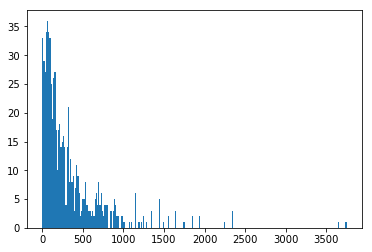

In [25]:
plt.hist(intermediate['likesPerPost'], 250)